# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading, studying and transforming dataset

In [2]:
from sklearn.datasets import load_iris
data = load_iris()

In [3]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df = pd.DataFrame(data.data)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df.columns = data.feature_names
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['Species'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# X and y matrix

In [8]:
X = df.drop('Species',axis=1)
y = df['Species']
print("X Shape:",X.shape)
print("y Shape:",y.shape)

X Shape: (150, 4)
y Shape: (150,)


# Splitting into train and test dataset

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

# K-Nearest Neighbors Classification Model

In [10]:
from sklearn.neighbors import KNeighborsClassifier

### Finding the best value for k

In [11]:
from sklearn.metrics import accuracy_score
k_range = range(1,26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

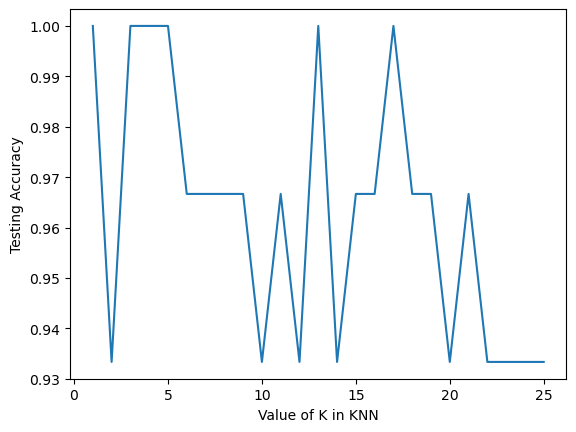

In [12]:
plt.xlabel("Value of K in KNN")
plt.ylabel("Testing Accuracy")
plt.plot(k_range,scores)

In [13]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

### Evaluating the model

In [14]:
y_pred = knn.predict(X_test)
print("Accuracy Score:{:.2f}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy Score:100.00%


In [15]:
from sklearn.metrics import f1_score

In [16]:
print("f1 score:",f1_score(y_test,y_pred,average="weighted"))

f1 score: 1.0


### Predicting the result

In [17]:
df = df.replace({0:"setosa",1:'versicolor',2:'virginica'})

In [18]:
test = df.sample(1).values
test

array([[4.8, 3.4, 1.9, 0.2, 'setosa']], dtype=object)

In [19]:
if knn.predict(test[:,0:4]) == 0:
    print("Species : setosa")
elif knn.predict(test[:,0:4]) == 1:
    print("Species : versicolor")
else:
    print("Species : virginica")

Species : setosa
